# How to read KBonus-BKG light curves with LightKurve

This tutorial shows how to download, read and work with MAST HLSP [KBonus-BKG](https://archive.stsci.edu/hlsp/kbonus-bkg). These light curves were extracted using PSF photometry for >600,000 sources recorded in the Kepler Target Pixel Files (TPFs). The extraction process and light curve creation is explained in [Martinez-Palomera et al. 2023](https://ui.adsabs.harvard.edu/abs/2023arXiv231017733M/abstract) 

In [3]:
# basi imports
import numpy as np
import matplotlib.pyplot as plt

import lightkurve as lk

## 1. Download KBonus-BKG light curve

First let's search for Kepler 686 target in the data base:

In [76]:
lk.search_lightcurve("Kepler-686", mission="Kepler", author="KBONUS-BKG")

SearchResult containing 1 data products.

 #  mission sequence   author   product_type exptime         target_name          distance start_time  end_time 
                                                s                                  arcsec                       
--- ------- -------- ---------- ------------ ------- ---------------------------- -------- ---------- ----------
  0  Kepler     None KBONUS-BKG         HLSP    1765 Gaia DR3 2100247945575646336      0.0 2009-05-02 2013-05-11

Notice the `target_name` is a Gaia designation, this is because KBonus-BKG used Gaia DR3 as input catalog, it contains sources with no KIC value, therefore Gaia identifiers were used. The `start_time` and `end_time` indicates the file contains multiple quarters, we will explore this later.

In [75]:
lc = lk.search_lightcurve("Kepler-686", mission="Kepler", author="KBONUS-BKG").download()
# get the file path
lc.filename

'/Users/jorgemarpa/.lightkurve/cache/mastDownload/HLSP/hlsp_kbonus-bkg_kepler_kepler_kic-003935914_kepler_v1.0/hlsp_kbonus-bkg_kepler_kepler_kic-003935914_kepler_v1.0_lc.fits'

By default the download function returns the stitched light cuve in KBonus-BKG.

In [74]:
lc

<KeplerLightCurve length=59073 LABEL="KIC 3935914" AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
       time              flux            flux_err      cadenceno ... psf_flat_flux_err sap_quality flatten_mask
                     electron / s      electron / s              ...    electron / s                           
       Time            float64           float64         int32   ...      float64         int32       int32    
----------------- ----------------- ------------------ --------- ... ----------------- ----------- ------------
169.7659579482861 8043.647435275865 3.2835956679785623      2977 ... 3.529999591175291      393216            0
              ...               ...                ...       ... ...               ...         ...          ...
1591.001940023154 7999.584768396891  3.585310710180754     72531 ... 3.844991393683759           0            0

The light curve contains 5,9073 cadences. There are multiple columns in the table:
 - `time`: time array in BKJD
 - `flux`: default flux column, this is the corrected PSF photometry stitched from all quarters
 - `flux_err`: default flux error column
 - `cadenceno`: cadence number value from the TPF
 - `quarter`: observing quarter
 - `sap_flux`: aperture flux
 - `sap_flux_err`: aperture flux error
 - `psf_flat_flux`: corrected PSF flux that was flatten with a b-spline model, usefull for transit detections
 - `psf_flat_flux_err`: corrected PSF flux error from the flatten version
 - `sap_quality`: quality mask from the TPF
 - `flatten_mask`: quality mask from the flattening process

## 2. Read the FITS file

### 2.1 Read the stitched light curve

We can read the FITS file directly with `lk.read()`, again, this will load the stitched light curve as before.

In [23]:
lc = lk.read(lc.filename)
lc

<KeplerLightCurve length=59073 LABEL="KIC 3935914" AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
       time              flux            flux_err      cadenceno ... psf_flat_flux_err sap_quality flatten_mask
                     electron / s      electron / s              ...    electron / s                           
       Time            float64           float64         int32   ...      float64         int32       int32    
----------------- ----------------- ------------------ --------- ... ----------------- ----------- ------------
169.7659579482861 8043.647435275865 3.2835956679785623      2977 ... 3.529999591175291      393216            0
              ...               ...                ...       ... ...               ...         ...          ...
1591.001940023154 7999.584768396891  3.585310710180754     72531 ... 3.844991393683759           0            0

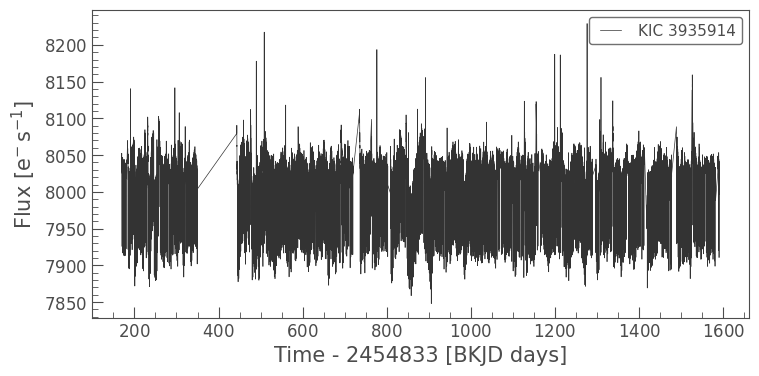

In [65]:
lc.plot()
plt.show()

We can change the default flux column with `.select_flux()`

In [66]:
lc_flat = lc.select_flux(flux_column="psf_flat_flux")

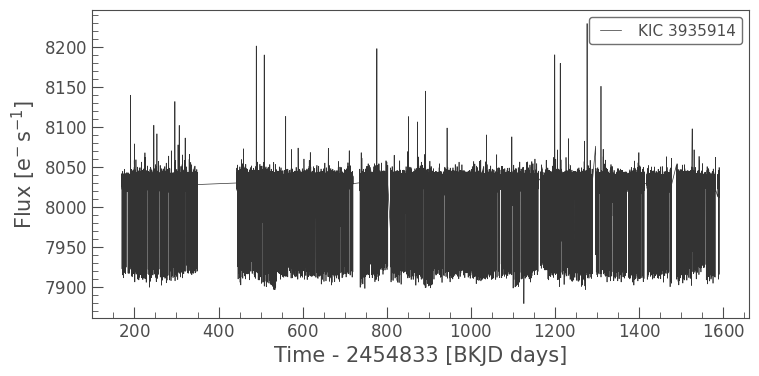

In [68]:
lc_flat.plot()
plt.show()

In [69]:
lc.meta

{'EXTNAME': 'PRIMARY',
 'CHECKSUM': '7WaGATXE0TaE7TUE',
 'DATASUM': '0',
 'SIMPLE': True,
 'BITPIX': 8,
 'NAXIS': 0,
 'EXTEND': True,
 'NEXTEND': 2,
 'EXTVER': 1,
 'DOI': '10.17909/7jbr-w430',
 'HLSPID': 'KBONUS-BKG',
 'HLSPLEAD': 'Jorge martinez-Palomera',
 'HLSPVER': 'V1.0',
 'LICENSE': 'CC BY 4.0',
 'LICENURL': 'https://creativecommons.org/licenses/by/4.0/',
 'ORIGIN': 'PSFMACHINE',
 'DATE': '2022-07-27',
 'CREATOR': 'lightkurve.LightCurve.to_fits()',
 'TELESCOP': 'Kepler',
 'INSTRUME': 'Kepler Photometer',
 'FILTER': 'KEPLER',
 'TIMESYS': 'TDB',
 'OBJECT': 'KIC 3935914',
 'KEPLERID': 3935914,
 'RADESYS': 'ICRS',
 'RA_OBJ': 285.2138188787228,
 'DEC_OBJ': 39.02746125454957,
 'EQUINOX': 2016.0,
 'PROCVER': '2.0.9',
 'VERSION': '1.1.2',
 'APERTURE': 'PSF + SAP',
 'MISSION': 'Kepler',
 'OBSMODE': 'long cadence',
 'XPOSURE': 1765.464,
 'MJD-BEG': 54953.03907252848,
 'MJD-END': 56423.50139254052,
 'LABEL': 'KIC 3935914',
 'TARGETID': 'Gaia DR3 2100247945575646336',
 'KEPMAG': 15.529999732

### 2.1 Read quarter light curves

We can load specific quarters by givin the `quarters` argument to the read method, this can be a list of quarters or `"any"` that returns all available quarters:

In [53]:
lcc = lk.read(lc.filename, quarters=[2, 3, 6])
lcc

Opening as `LightCurveCollection` because `quarters` set to `[2, 3, 6].`


LightCurveCollection of 3 objects:
    0: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=2 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    1: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=3 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    2: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=6 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>

It returns a Light Curve Collection object becouse we set the `quarters` argument to multiple values.

In [58]:
lcc = lk.read(lc.filename, quarters="any")
lcc

Opening as `LightCurveCollection` because `quarters` set to `any.`


LightCurveCollection of 15 objects:
    0: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=2 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    1: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=3 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    2: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=5 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    3: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=6 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    4: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=7 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    5: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=8 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    6: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=9 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    7: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=10 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    8: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=11 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    9: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=12 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    10: <KeplerLightCurve LABEL="KIC 3935914" QUART

In [59]:
lcc[0]

<KeplerLightCurve length=4081 LABEL="KIC 3935914" QUARTER=2 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
       time               flux             flux_err      ...      red_chi2        psf_flux_nova   psf_flux_err_nova
                      electron / s       electron / s    ...                       electron / s      electron / s  
       Time             float64            float64       ...      float64            float64           float64     
------------------ ------------------ ------------------ ... ------------------ ----------------- -----------------
169.52074926998466  7630.217904374363  3.264768996621107 ...  13090.60900554352 7693.928835633413 3.506596217749835
               ...                ...                ... ...                ...               ...               ...
 258.4673632183112 7798.2570391085565 3.5725741748899504 ... 13800.473508949392 7226.403847714606 3.415483239851062

The quarter light curves have more columns:

- `time`: time array in BKJD
- `flux`: default flux column, this is the corrected PSF photometry
- `flux_err`: default flux error column, from the corrected PSF photometry
- `cadenceno`: cadence number value from the TPF
- `sap_flux`: aperture flux
- `sap_flux_err`: aperture flux error
- `centroid_column`: centroid column value
- `centroid_row`: centroid row value
- `sap_quality`: quality flag from the TPF
- `sap_bkg`: aperture flux from the background model
- `red_chi2`: reduce chi square value from the PSF model
- `psf_flux_nova`: mean PSF flux
- `psf_flux_err_nova`: mean PSF flux error

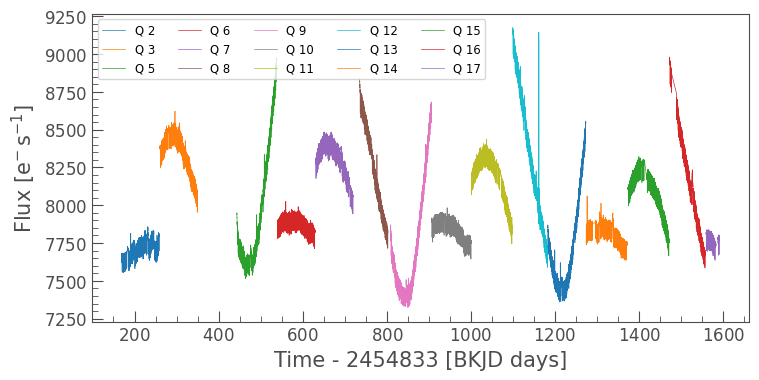

In [77]:
ax = lcc.plot()
ax.legend([f"Q {x}" for x in lcc.quarter], ncols=5, fontsize="small")
plt.show()

We can change the default flux column with `.select_flux()`

In [61]:
lcc_sap = lk.LightCurveCollection([x.select_flux(flux_column="sap_flux") for x in lcc])

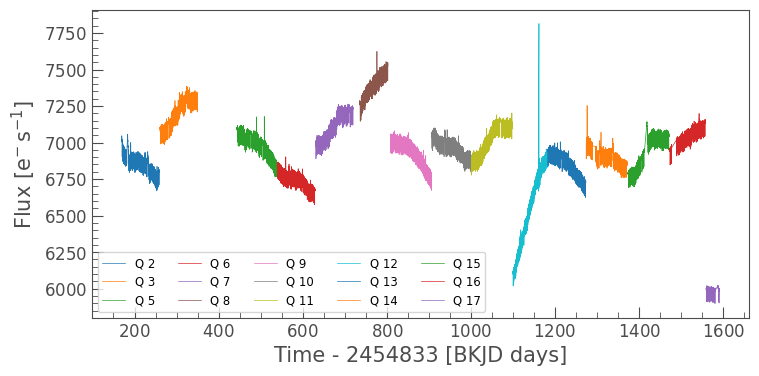

In [78]:
ax = lcc_sap.plot()
ax.legend([f"Q {x}" for x in lcc_sap.quarter], ncols=5, fontsize="small")
plt.show()

## 3. Warning

Some sources in KBonus-BKG were extracted with partial data, i.e. using pixels in the wing of the PSF, this is due to sources falling out of the edge of the TPF or becouse of saturated pixel rejection removed the central pixels of a bright source. 
The light curves provide the `psffrac` metric as the fraction of the PSF on the TPF used for photometry. This valu is close to 1 for sources with full coverage, and close to 0 for sources with partial data. LightKurve will show a warning when a source has `psffrac < 0.6` and also for sources brigther than $K_{p} < 12$ that produced saturated pixels that were avoid for model fitting.

In [79]:
lc = lk.search_lightcurve("Kepler-10", mission="Kepler", author="KBONUS-BKG").download()

Kepler magnitude is bright (less than 12), indicating the target is saturated. KBONUS-BKG data is invalid for saturated targets.
PSF Fraction is low, indicating not all of the flux is captured in the PSF model. This data may be unreliable.


In [80]:
lc.meta["KEPMAG"]

10.9610004425049

In [82]:
lcq = lk.read(lc.filename, quarters="any")

Opening as `LightCurveCollection` because `quarters` set to `any.`
Kepler magnitude is bright (less than 12), indicating the target is saturated. KBONUS-BKG data is invalid for saturated targets.
PSF Fraction is low, indicating not all of the flux is captured in the PSF model. This data may be unreliable.


In [84]:
for x in lcq:
    print(f"Quarter {x.quarter} \tPSFFRAC = {x.psffrac}")

Quarter 0 	PSFFRAC = 0.5194949004483103
Quarter 1 	PSFFRAC = 0.539386781625761
Quarter 2 	PSFFRAC = 0.1763822145682909
Quarter 3 	PSFFRAC = 0.4996876424549876
Quarter 5 	PSFFRAC = 0.534104669679446
Quarter 6 	PSFFRAC = 0.1847643659319657
Quarter 7 	PSFFRAC = 0.4972986839177628
Quarter 9 	PSFFRAC = 0.5370618973720332
Quarter 10 	PSFFRAC = 0.1867926080084176
Quarter 11 	PSFFRAC = 0.4891589208946653
Quarter 13 	PSFFRAC = 0.5414189358151809
Quarter 14 	PSFFRAC = 0.1889579738852871
Quarter 15 	PSFFRAC = 0.4906347556054315
Quarter 17 	PSFFRAC = 0.5802545004987487
